# Hackathon

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [2]:
#reading data
df_travel=pd.read_csv("Traveldata_train.csv")
df_survey=pd.read_csv("Surveydata_train.csv")

#saving copy
data_travel_copy=df_travel.copy()
data_survey_copy=df_survey.copy()

## Reality checks

In [3]:
print(df_travel.info())
print(df_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID         

In [4]:
df_survey["Overall_Experience"]=df_survey["Overall_Experience"].astype("object")
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  object
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

### Taking a look on the data:

#### Travel: 

In [5]:
df_travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [6]:
df_travel.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [7]:
df_travel.sample(10)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
50055,98850056,Male,Loyal Customer,24.0,Business Travel,Business,2558,0.0,0.0
13582,98813583,Female,Loyal Customer,20.0,Business Travel,Business,3531,124.0,109.0
17195,98817196,Male,Disloyal Customer,21.0,Business Travel,Eco,1737,0.0,0.0
80010,98880011,Female,Loyal Customer,33.0,NaN,Business,926,0.0,0.0
21266,98821267,Female,Loyal Customer,42.0,Business Travel,Business,1425,48.0,49.0
3922,98803923,Male,Loyal Customer,43.0,Personal Travel,Eco,2644,0.0,0.0
91266,98891267,Male,Loyal Customer,42.0,Business Travel,Business,2374,0.0,0.0
28461,98828462,Male,Loyal Customer,30.0,Business Travel,Business,3980,0.0,6.0
32363,98832364,Male,Loyal Customer,46.0,Business Travel,Business,1812,56.0,53.0
88706,98888707,Female,Loyal Customer,7.0,NaN,Eco,1748,0.0,0.0


#### Survey:

In [8]:
df_survey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [9]:
df_survey.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [10]:
df_survey.sample(10)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
60728,98860729,1,Excellent,Green Car,NaN,Excellent,Very Convenient,Acceptable,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Excellent
12457,98812458,1,Extremely Poor,Ordinary,Excellent,Extremely Poor,Convenient,Needs Improvement,Extremely Poor,Acceptable,Needs Improvement,Acceptable,Excellent,Acceptable,Good,Poor,Needs Improvement
18817,98818818,1,Good,Ordinary,Good,Good,Inconvenient,Good,Poor,Poor,Acceptable,Excellent,Excellent,Excellent,Poor,Excellent,Poor
20106,98820107,1,Excellent,Green Car,Good,Excellent,Manageable,Acceptable,Excellent,Acceptable,Acceptable,Excellent,Excellent,Good,Good,Good,Acceptable
17188,98817189,0,Poor,Green Car,Poor,Poor,Inconvenient,Acceptable,Acceptable,Good,Poor,Poor,Poor,Poor,Acceptable,Poor,Good
73638,98873639,1,Good,Ordinary,Extremely Poor,Good,Manageable,Needs Improvement,Good,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Good,Needs Improvement
94140,98894141,1,Good,Ordinary,Excellent,Excellent,Very Convenient,Good,Good,Good,Good,NaN,Acceptable,Excellent,Poor,Good,Good
21970,98821971,0,Acceptable,Green Car,Extremely Poor,Acceptable,Manageable,Excellent,Acceptable,Excellent,Excellent,Acceptable,Excellent,Good,Acceptable,Good,Excellent
50723,98850724,0,Needs Improvement,Ordinary,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Acceptable,Needs Improvement,Needs Improvement
22527,98822528,0,Acceptable,Green Car,Good,Good,Convenient,Poor,Acceptable,Good,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good


### Respondiendo dudas sobre  las bases:

In [11]:
print("shape travel:",df_travel.shape,"\n shape de survey:",df_survey.shape)

shape travel: (94379, 9) 
 shape de survey: (94379, 17)


In [12]:
print("cant de usuarios unicos en travel:",df_travel["ID"].nunique())
print("cant de usurios unicos en survey:",df_survey["ID"].nunique())

cant de usuarios unicos en travel: 94379
cant de usurios unicos en survey: 94379


In [13]:
id_unicos_survey=set(df_survey["ID"].unique())
id_unicos_travel=set(df_travel["ID"].unique())

union_ids=id_unicos_survey.union(id_unicos_travel)
intersection_ids= id_unicos_survey.intersection(id_unicos_travel)

print("Los usuarios de travel son los mismos de survey ? ",union_ids==intersection_ids)

Los usuarios de travel son los mismos de survey ?  True


In [14]:
#Verificando duplicados en general
print("hay rows duplicadas en survey?: ",df_survey.duplicated().any())
print("hay rows duplicadas en travel?: ",df_travel.duplicated().any())

hay rows duplicadas en survey?:  False
hay rows duplicadas en travel?:  False


In [15]:
print("hay mas de  un viaje por usurio en travel? ",df_travel.duplicated(subset=["ID"]).any())
print("hay mas de  un viaje por usurio en survey? ",df_survey.duplicated(subset=["ID"]).any())

hay mas de  un viaje por usurio en travel?  False
hay mas de  un viaje por usurio en survey?  False


In [16]:
print(df_survey.columns)
print(df_travel.columns)

Index(['ID', 'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')
Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')


In [17]:
df=df_travel.merge(df_survey,on="ID",how="left",indicator=True)
df["_merge"].value_counts()

_merge
both          94379
left_only         0
right_only        0
Name: count, dtype: int64

In [18]:
df.drop(columns=["_merge"],inplace=True)

In [19]:
df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  object 
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [21]:
df.dtypes.value_counts()

object     20
float64     3
int64       2
Name: count, dtype: int64

In [22]:
columns_cat=df.select_dtypes(include="object").columns
columns_cat

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [23]:
columns_num=df.select_dtypes(exclude="object").columns
columns_num

Index(['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

Observaciones:
- Tenemos un data ser de 94379 filas y 25 columnas
- De las 25 columnas 20 son categoricas y 5 son numericas (3 tipo float y 3 tipo int)
- Las variables categoricas son: `['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding','Overall_Experience']`

- `Overall_Experience` es nuestro target

- Las varibles numericas son : `['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins',]`.

 - De las varibles numericas  `Departure_Delay_in_Mins` ,` Arrival_Delay_in_Mins` y `Age` son de tipo float y el retos es tipo int

 - La varieble ID podria ser dropeada mas adelante ya que cada fila representa un usurio distinto


### Explorando nulos

In [24]:
cant_nulos=pd.concat([df.isnull().sum(),df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:"count",1:"percentage"})
cant_nulos.sort_values(by="percentage",ascending=False)

,count,percentage
Type_Travel,9226,0.097755
Customer_Type,8951,0.094841
Arrival_Time_Convenient,8930,0.094619
Catering,8741,0.092616
Onboard_Service,7601,0.080537
Arrival_Delay_in_Mins,357,0.003783
Baggage_Handling,142,0.001505
Online_Support,91,0.000964
Legroom,90,0.000954
CheckIn_Service,77,0.000816


In [25]:
#revisando categorias unicas de las varibles categoricas
# (ver si los valores coincidin y detectar valores nulos disfrasados )
for i in columns_cat:
  print(i)
  print(df[i].unique(),df[i].nunique())
  print("-"*100)

Gender
['Female' 'Male' nan] 2
----------------------------------------------------------------------------------------------------
Customer_Type
['Loyal Customer' 'Disloyal Customer' nan] 2
----------------------------------------------------------------------------------------------------
Type_Travel
[nan 'Personal Travel' 'Business Travel'] 2
----------------------------------------------------------------------------------------------------
Travel_Class
['Business' 'Eco'] 2
----------------------------------------------------------------------------------------------------
Overall_Experience
[0 1] 2
----------------------------------------------------------------------------------------------------
Seat_Comfort
['Needs Improvement' 'Poor' 'Acceptable' 'Good' 'Excellent'
 'Extremely Poor' nan] 6
----------------------------------------------------------------------------------------------------
Seat_Class
['Green Car' 'Ordinary'] 2
---------------------------------------------------

Obsrvaciones:
- Las variables/ columnas que no tienen nulos son: `Seat_Class`,`Overall_Experience`, `Travel_Distance`	,`Travel_Class`	,`ID`
- Las varibles que presetan nulos, a lo mucho tienen el 9.7 %de sus registros nulos (una cantidad despeciable considerando el tamaño de la data)
- Podriamos  Explorar  lore regitros corrspondientes  las 5 varibles/ columnas que presentan mas nulos las cuales son: `Type_Travel`, `Customer_Type`,`Arrival_Time_Convenient`, `Catering`, `Onboard_Service`. Para ver metodos de imputacion



#### Dropear NAs conjuntos 

In [26]:
df.dropna(thresh=1,axis=1).shape

(94379, 25)

In [27]:
### Ver si hay filas con un gran porcentaje de nas
total_rows= df.shape[0]

### Contar para cada threshold cuantos rows se eliminan
for i in range(int(0.3*len(df.columns))):
    rows_df_thres= len(df.dropna(thresh=len(df.columns)-i,axis=0))
    print('thresh: ', i)
    print("porcentaje de filas eliminadas: " ,1- (rows_df_thres/total_rows) )

thresh:  0
porcentaje de filas eliminadas:  0.411913667235296
thresh:  1
porcentaje de filas eliminadas:  0.05496985558227996
thresh:  2
porcentaje de filas eliminadas:  0.002797232435181596
thresh:  3
porcentaje de filas eliminadas:  0.001769461426800456
thresh:  4
porcentaje de filas eliminadas:  0.0007734771506373583
thresh:  5
porcentaje de filas eliminadas:  0.00026488943514979546
thresh:  6
porcentaje de filas eliminadas:  3.1786732217931046e-05


**Observations:**
- Al eliminar todos los NAs se eliminan el 41% de la data (thresh=0)
- Al eliminar los rows que tienen 2 o ma's NAs se eliminar el 5% de la data. Este parece ser un buen cuttoff point. Aunque no va eliminar un gran porcentaje NAs. La incertidumbre sobre la prediccion de ese individuo se reduce cuando tiene ma's nas.

**drop na eliminar 2 o ma's registros**

In [28]:
### Eliminar con el threshold que nos aseguramos que no eliminara tanta data
##?? 
#df.dropna(thresh=len(df.columns)-1, inplace=True )
#df.reset_index(inplace=True,drop=True)

**Observations:**
- Ya no hay registros con dos o ma's NAs.

In [29]:
### Nuevo shape
df.shape

(89191, 25)

#### Patrones en missing values

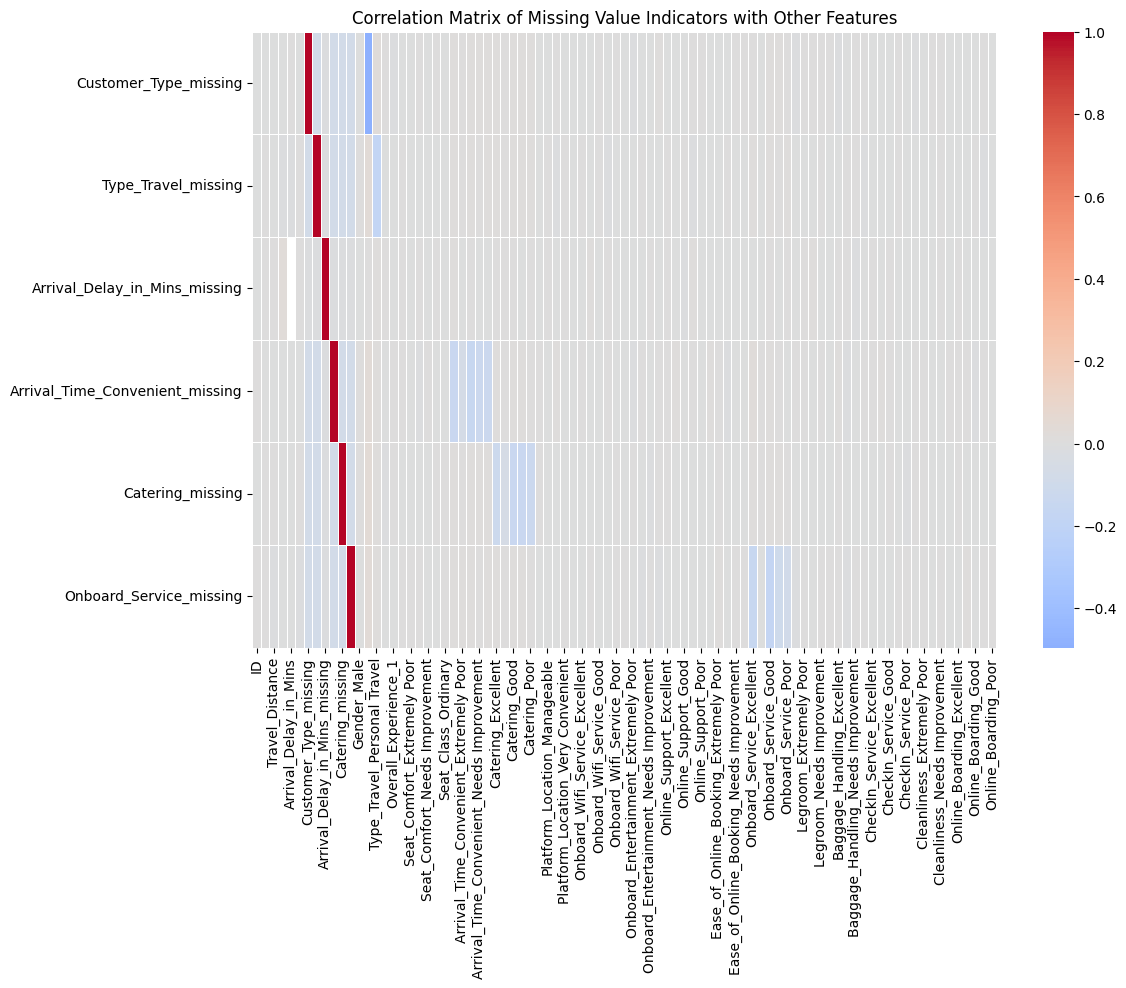

In [54]:
# Step 1: Create missing value indicators
df_analysis_copy = df.copy()
null_features = df_analysis_copy.columns[df_analysis_copy.isnull().any()]
for feature in null_features:
    df_analysis_copy[f'{feature}_missing'] = df_analysis_copy[feature].isnull().astype(int)

# Step 2: Compute correlation matrix
corr_matrix = pd.get_dummies(df_analysis_copy, drop_first=True).corr()

# Extract the correlation of missing value indicators with other features
missing_corr_matrix = corr_matrix.loc[[f'{feature}_missing' for feature in null_features], :]

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(missing_corr_matrix, cmap='coolwarm', center=0,linewidths=0.5)
plt.title('Correlation Matrix of Missing Value Indicators with Other Features')
plt.show()



**Observations**:
- Solo hay unas cuantas variables que esta'n correlacionadas con los missing values. 
- Usar kmeans para imputar puede ser excesivo porque los vecinos ma's cercanos tomara' en base a todas las variables... cuando la mayori'a no afectan a los missing values y tienen 0 correlacion
-  Por ello, seri'a mejor probar linear regression que le da un peso a la variable de acuerdo a la importancia que tiene... pero no es perfecto se enecesitari'a lasso, esta la opcion de usar random forest que tambie'n selecciona variables, pero eso agregari'a 2 hyperparametros ma's al modelo

## EDA

### Univariate

#### Numerico:

In [31]:
columns_num=columns_num[columns_num!="ID"]

In [32]:
columns_num

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

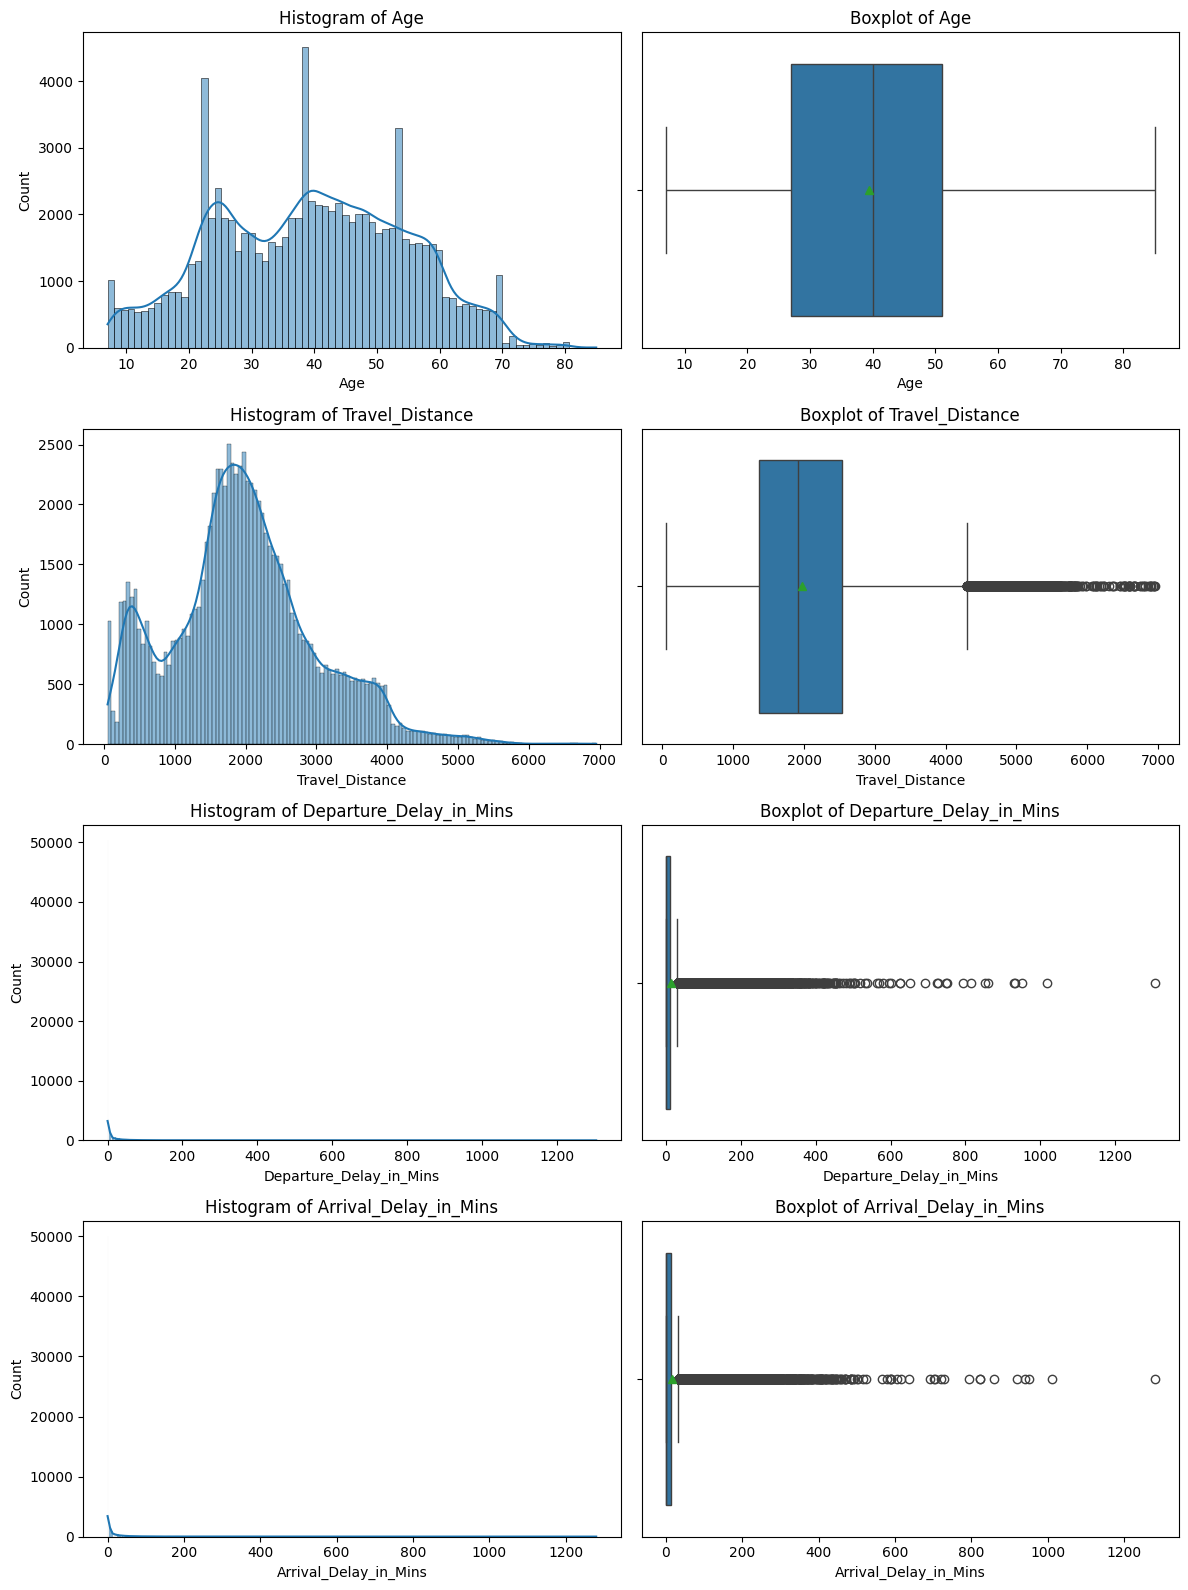

In [33]:
# Number of variables
num_vars = len(columns_num)

# Create subplots: 2 rows per variable (one for histogram, one for boxplot)
fig, axes = plt.subplots(num_vars, 2, figsize=(12, 4 * num_vars))

for i, var in enumerate(columns_num):
    # Histogram
    sns.histplot(df[var], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1],showmeans=True)
    axes[i, 1].set_title(f'Boxplot of {var}')

# Adjust layout
plt.tight_layout()
plt.show()

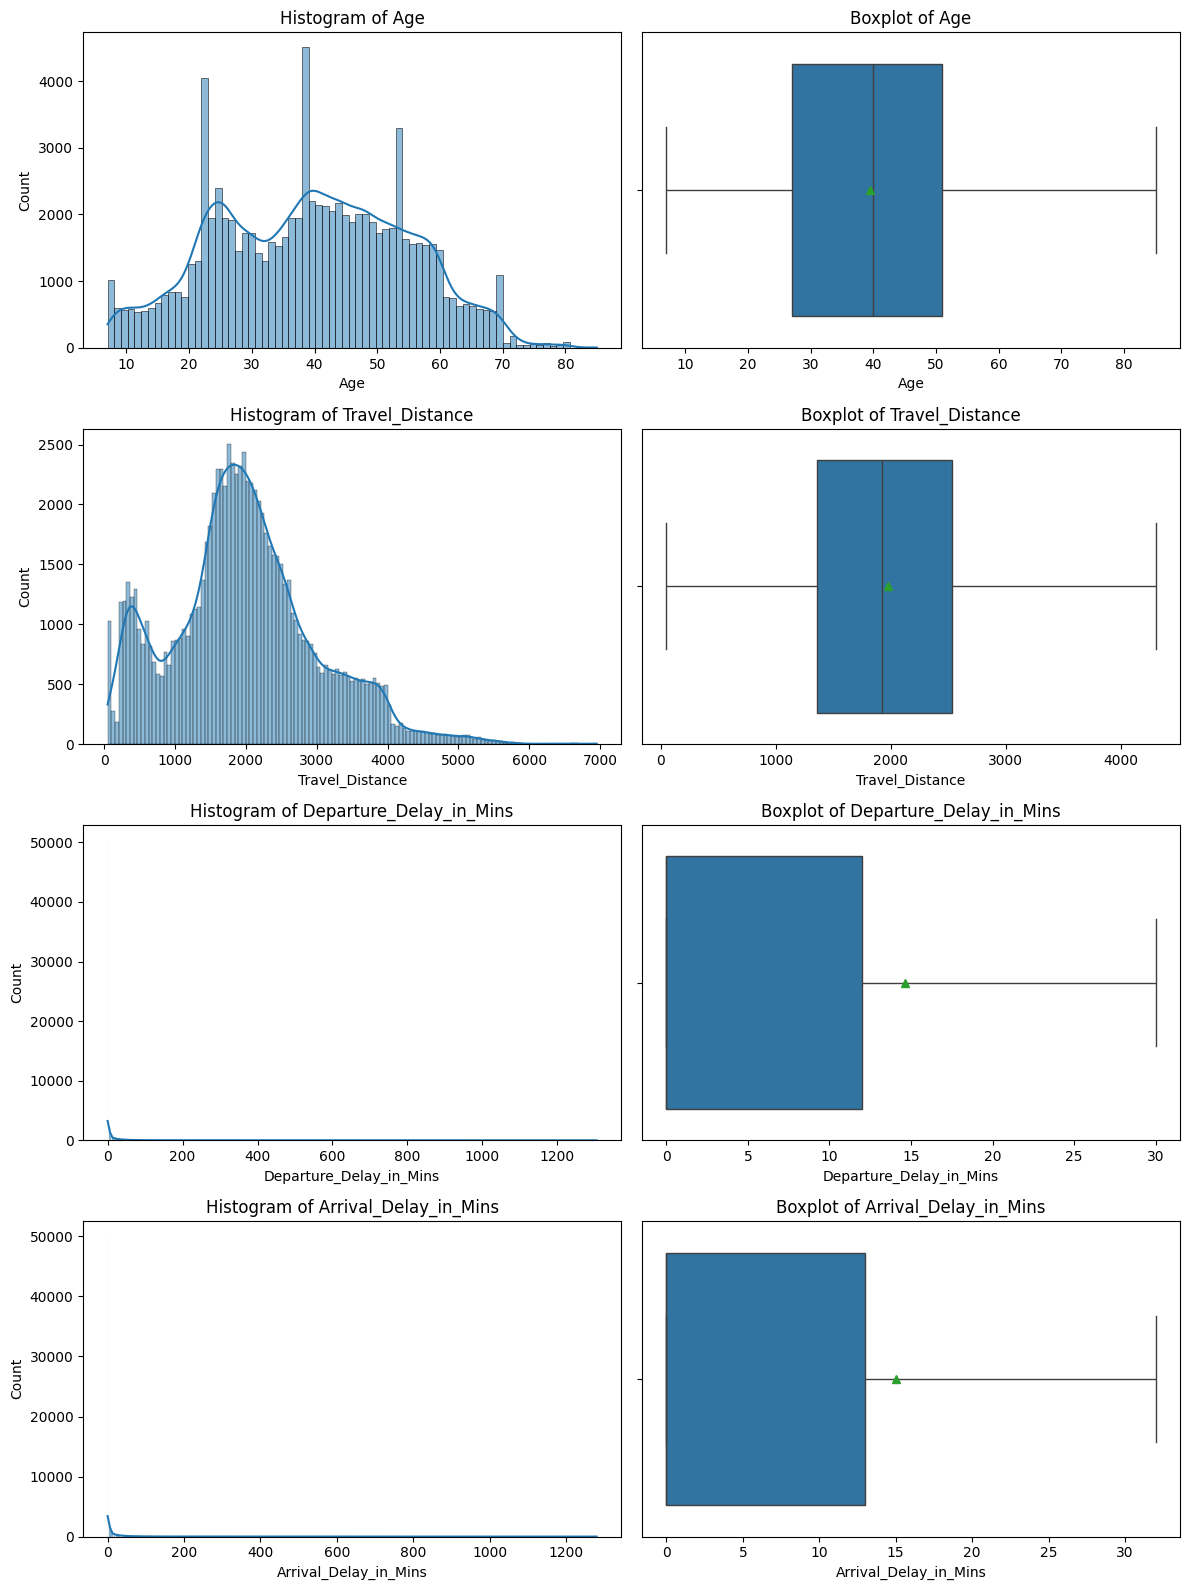

In [34]:
# Number of variables
num_vars = len(columns_num)

# Create subplots: 2 rows per variable (one for histogram, one for boxplot)
fig, axes = plt.subplots(num_vars, 2, figsize=(12, 4 * num_vars))

for i, var in enumerate(columns_num):
    # Histogram
    sns.histplot(df[var], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1],showmeans=True,showfliers=False)
    axes[i, 1].set_title(f'Boxplot of {var}')

# Adjust layout
plt.tight_layout()
plt.show()

In [35]:
#Computing basic statistic of each numerical varibles 
#combination of basic statisting and skewd
df_des=pd.concat([df.describe().T,df.select_dtypes(include="number").apply(lambda x:x.skew())],axis=1).rename(columns={0:"skew"})
#adding IQR to the statistics
df_des["IQR"]=df_des["75%"]-df_des["25%"]
df_des

,count,mean,std,min,25%,50%,75%,max,skew,IQR
ID,89191.0,9.884718e+07,27250.086997,98800001.0,98823582.5,98847171.0,98870780.5,98894379.0,0.000718,47198.0
Age,89191.0,3.943804e+01,15.115941,7.0,27.0,40.0,51.0,85.0,-0.002024,24.0
Travel_Distance,89191.0,1.978510e+03,1027.433190,50.0,1359.0,1922.0,2537.0,6951.0,0.473192,1178.0
Departure_Delay_in_Mins,89191.0,1.462483e+01,37.640793,0.0,0.0,0.0,12.0,1305.0,6.433548,12.0
Arrival_Delay_in_Mins,89021.0,1.502169e+01,38.075670,0.0,0.0,0.0,13.0,1280.0,6.280087,13.0


In [36]:
1592/60

26.533333333333335

In [37]:
600/60

10.0

In [38]:
#definiendo bigotes de la distribucion
low_whisk= df_des["25%"]-1.5*df_des["IQR"]
low_whisk.drop(labels=["ID"],inplace=True)
print(low_whisk)
upper_whisk= df_des["75%"]+1.5*df_des["IQR"]
upper_whisk.drop(labels=["ID"],inplace=True)
print(upper_whisk)

Age                         -9.0
Travel_Distance           -408.0
Departure_Delay_in_Mins    -18.0
Arrival_Delay_in_Mins      -19.5
dtype: float64
Age                          87.0
Travel_Distance            4304.0
Departure_Delay_in_Mins      30.0
Arrival_Delay_in_Mins        32.5
dtype: float64


In [39]:
#pocentaje de ouliers por varibles
pd.concat([((df[columns_num]<low_whisk)| (df[columns_num]>upper_whisk)).sum()/df.shape[0]*100,((df[columns_num]<low_whisk)| (df[columns_num]>upper_whisk)).sum()],axis=1).rename(columns={0:"porcentaje",1:"conteo"})


,porcentaje,conteo
Age,0.000000,0
Travel_Distance,2.045049,1824
Departure_Delay_in_Mins,13.891536,12390
Arrival_Delay_in_Mins,13.428485,11977


In [40]:
#Cantidad de usuarios que presentan alguna de esas medias outliers
df.loc[((df[columns_num]<low_whisk)| (df[columns_num]>upper_whisk)).any(axis=1),"ID"].nunique()

15595

#### Categoricas

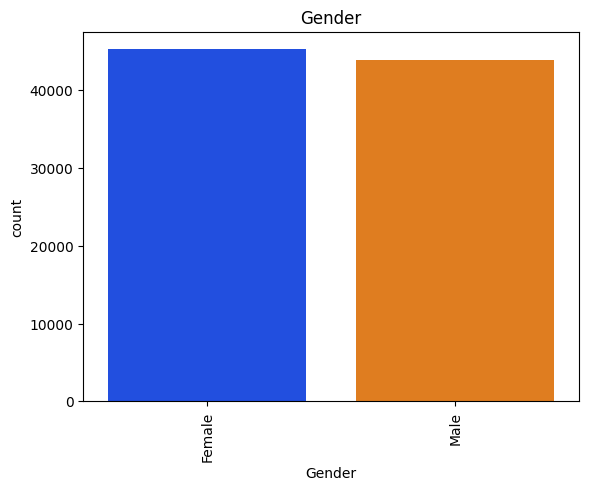

        count  proportion
Gender                   
Female  45255    0.507394
Male    43936    0.492606
------------------------------------------------------------


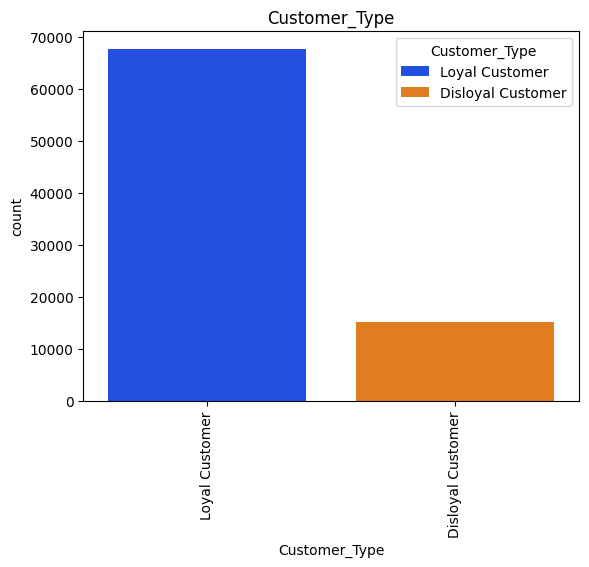

                   count  proportion
Customer_Type                       
Loyal Customer     67604    0.817411
Disloyal Customer  15101    0.182589
------------------------------------------------------------


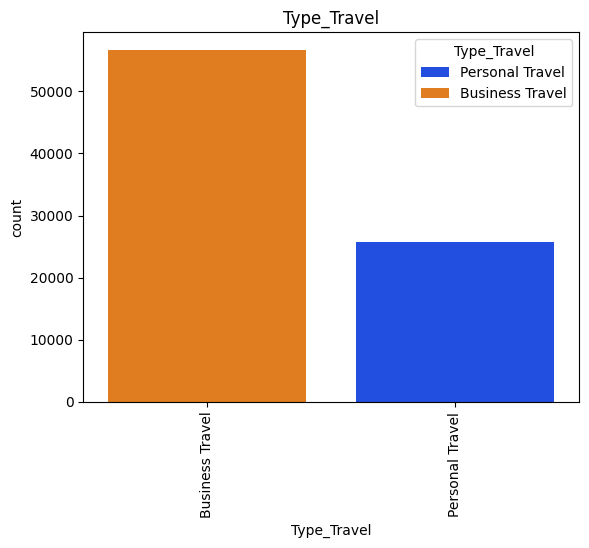

                 count  proportion
Type_Travel                       
Business Travel  56685    0.687941
Personal Travel  25713    0.312059
------------------------------------------------------------


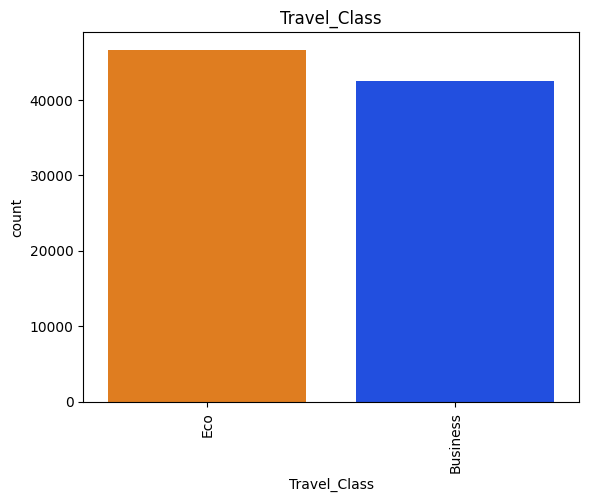

              count  proportion
Travel_Class                   
Eco           46639    0.522912
Business      42552    0.477088
------------------------------------------------------------


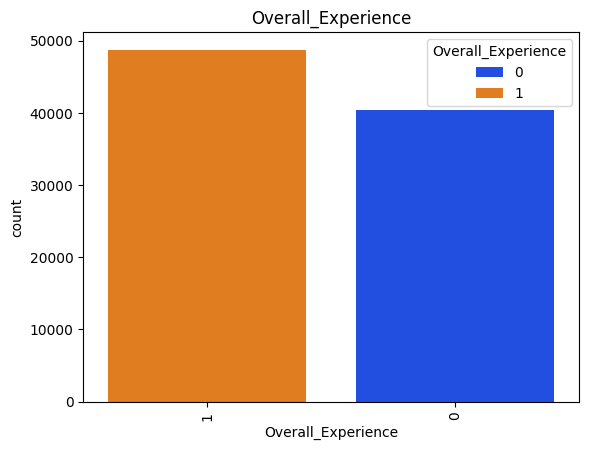

                    count  proportion
Overall_Experience                   
1                   48737    0.546434
0                   40454    0.453566
------------------------------------------------------------


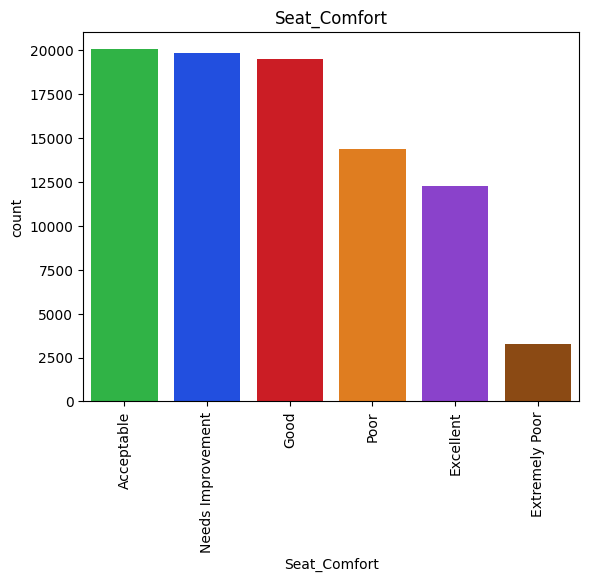

                   count  proportion
Seat_Comfort                        
Acceptable         20020    0.224462
Needs Improvement  19817    0.222186
Good               19487    0.218486
Poor               14351    0.160902
Excellent          12274    0.137615
Extremely Poor      3242    0.036349
------------------------------------------------------------


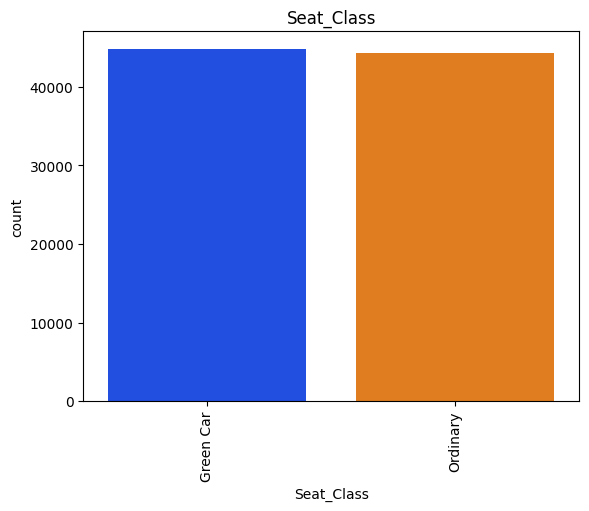

            count  proportion
Seat_Class                   
Green Car   44825    0.502573
Ordinary    44366    0.497427
------------------------------------------------------------


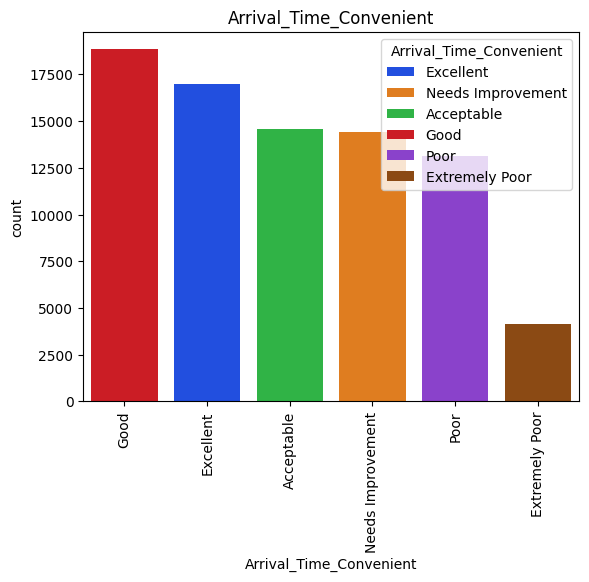

                         count  proportion
Arrival_Time_Convenient                   
Good                     18837    0.229515
Excellent                16979    0.206877
Acceptable               14577    0.177610
Needs Improvement        14394    0.175380
Poor                     13139    0.160089
Extremely Poor            4147    0.050528
------------------------------------------------------------


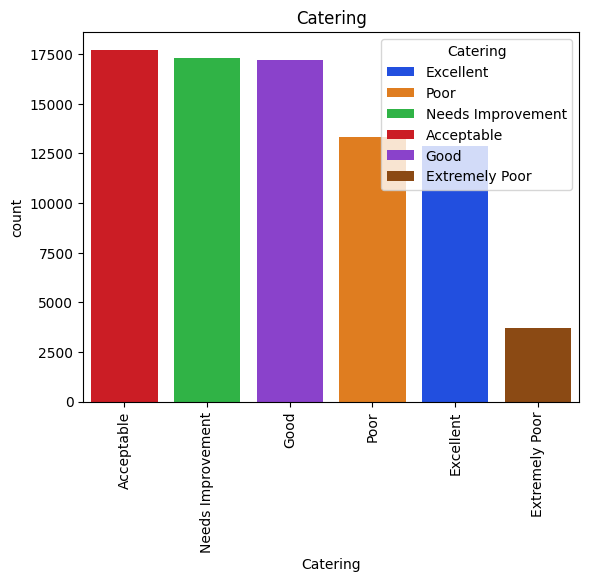

                   count  proportion
Catering                            
Acceptable         17729    0.215739
Needs Improvement  17281    0.210287
Good               17229    0.209655
Poor               13322    0.162112
Excellent          12893    0.156891
Extremely Poor      3724    0.045316
------------------------------------------------------------


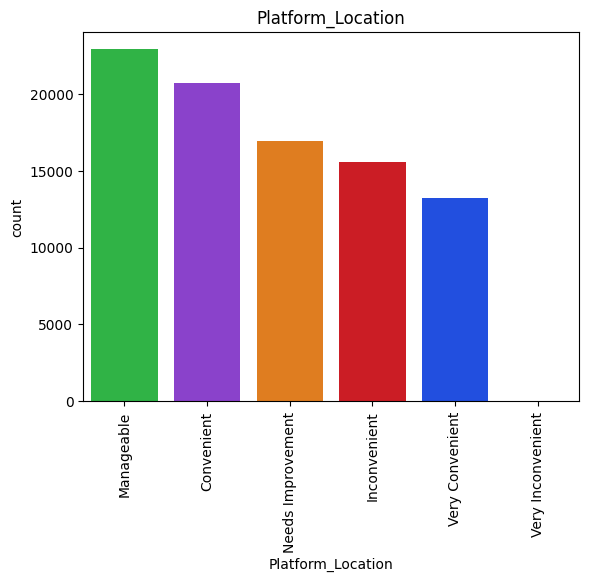

                   count  proportion
Platform_Location                   
Manageable         22864    0.256349
Convenient         20702    0.232109
Needs Improvement  16887    0.189335
Inconvenient       15529    0.174109
Very Convenient    13207    0.148075
Very Inconvenient      2    0.000022
------------------------------------------------------------


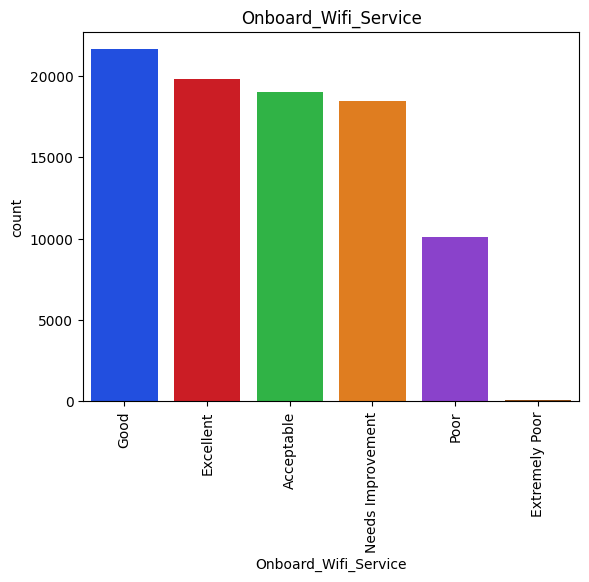

                      count  proportion
Onboard_Wifi_Service                   
Good                  21630    0.242513
Excellent             19844    0.222489
Acceptable            19035    0.213418
Needs Improvement     18473    0.207117
Poor                  10123    0.113498
Extremely Poor           86    0.000964
------------------------------------------------------------


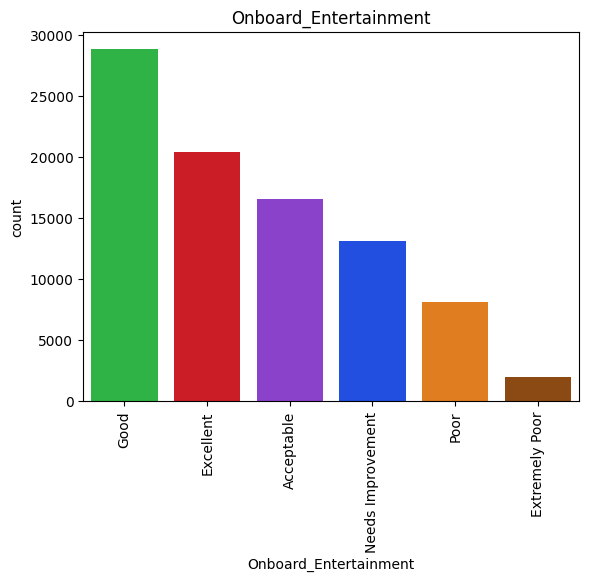

                       count  proportion
Onboard_Entertainment                   
Good                   28812    0.323037
Excellent              20456    0.229350
Acceptable             16609    0.186218
Needs Improvement      13132    0.147235
Poor                    8170    0.091601
Extremely Poor          2012    0.022558
------------------------------------------------------------


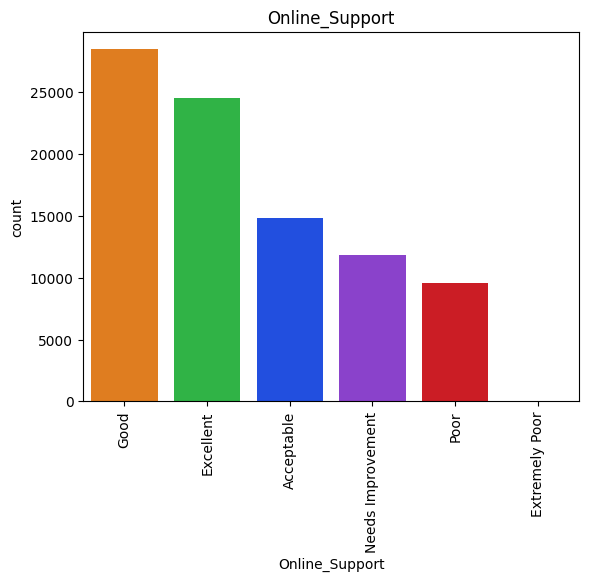

                   count  proportion
Online_Support                      
Good               28422    0.318664
Excellent          24539    0.275129
Acceptable         14847    0.166463
Needs Improvement  11803    0.132334
Poor                9579    0.107399
Extremely Poor         1    0.000011
------------------------------------------------------------


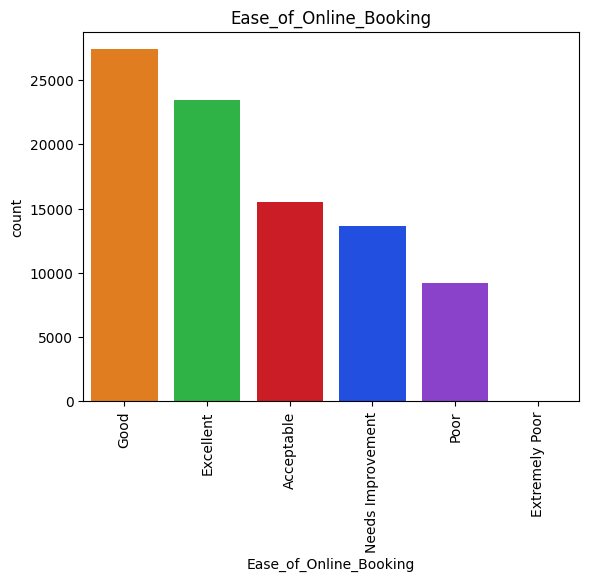

                        count  proportion
Ease_of_Online_Booking                   
Good                    27370    0.306870
Excellent               23437    0.262773
Acceptable              15485    0.173616
Needs Improvement       13675    0.153323
Poor                     9210    0.103262
Extremely Poor             14    0.000157
------------------------------------------------------------


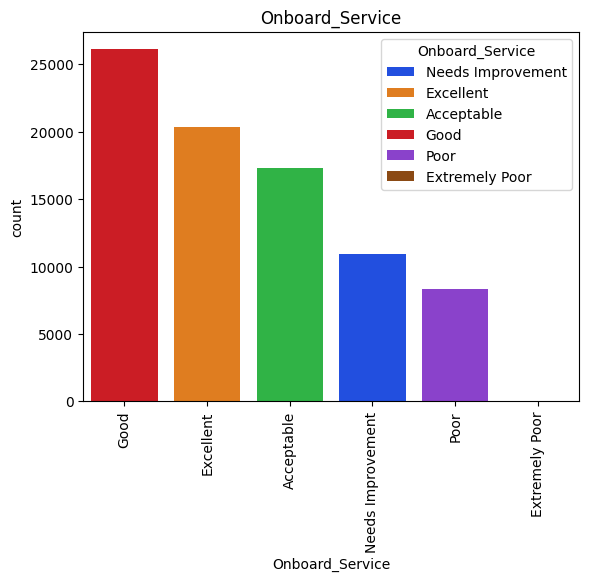

                   count  proportion
Onboard_Service                     
Good               26113    0.314300
Excellent          20355    0.244996
Acceptable         17339    0.208695
Needs Improvement  10903    0.131230
Poor                8369    0.100731
Extremely Poor         4    0.000048
------------------------------------------------------------


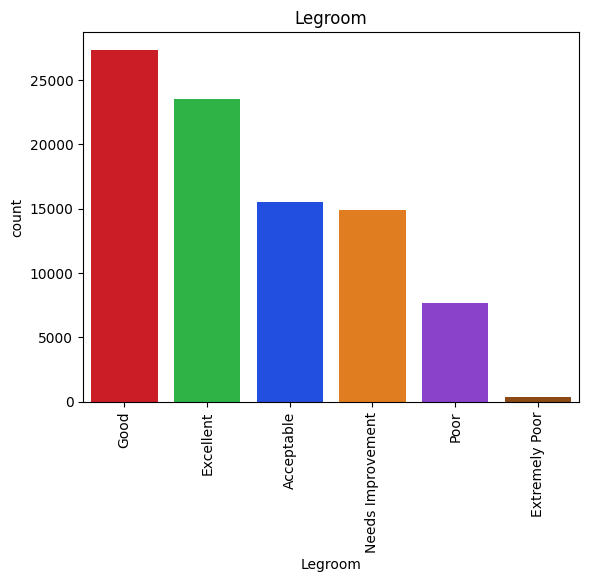

                   count  proportion
Legroom                             
Good               27349    0.306634
Excellent          23486    0.263323
Acceptable         15482    0.173583
Needs Improvement  14880    0.166833
Poor                7665    0.085939
Extremely Poor       329    0.003689
------------------------------------------------------------


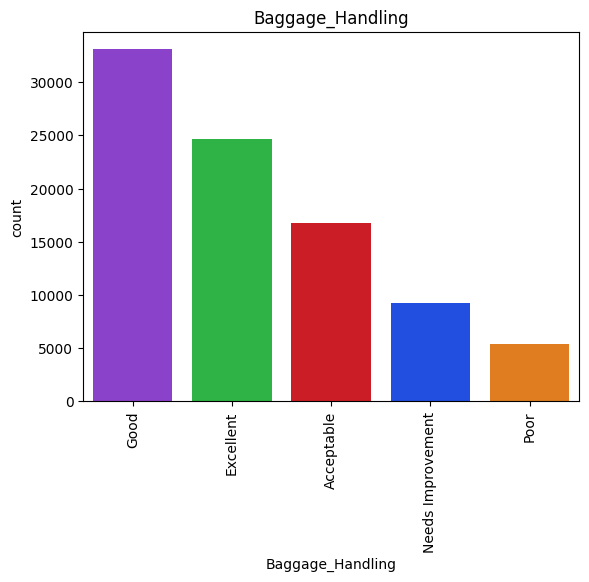

                   count  proportion
Baggage_Handling                    
Good               33085    0.370945
Excellent          24627    0.276115
Acceptable         16786    0.188203
Needs Improvement   9256    0.103777
Poor                5437    0.060959
------------------------------------------------------------


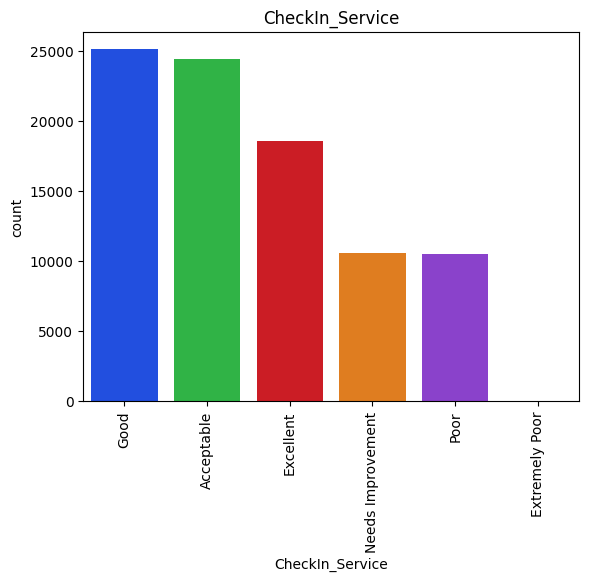

                   count  proportion
CheckIn_Service                     
Good               25085    0.281250
Acceptable         24410    0.273682
Excellent          18572    0.208227
Needs Improvement  10603    0.118880
Poor               10520    0.117949
Extremely Poor         1    0.000011
------------------------------------------------------------


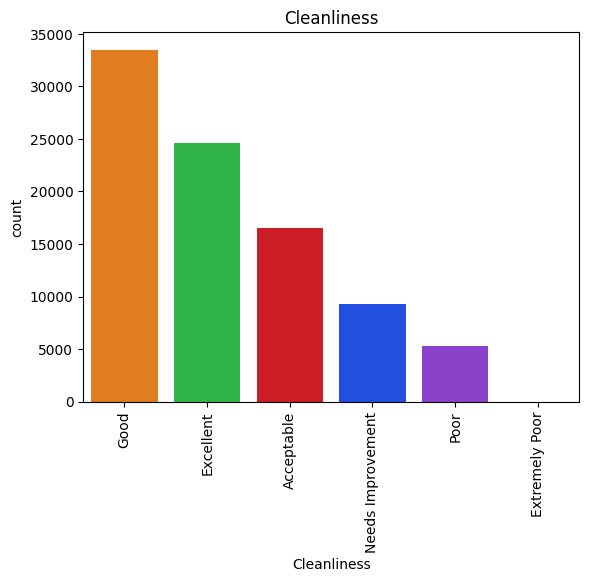

                   count  proportion
Cleanliness                         
Good               33495    0.375542
Excellent          24617    0.276003
Acceptable         16490    0.184884
Needs Improvement   9277    0.104013
Poor                5307    0.059502
Extremely Poor         5    0.000056
------------------------------------------------------------


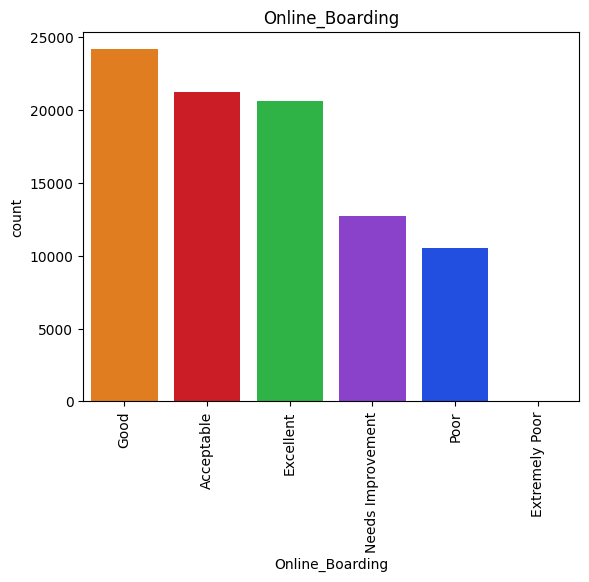

                   count  proportion
Online_Boarding                     
Good               24143    0.270689
Acceptable         21235    0.238085
Excellent          20589    0.230842
Needs Improvement  12700    0.142391
Poor               10514    0.117882
Extremely Poor        10    0.000112
------------------------------------------------------------


In [41]:
for k in columns_cat:
     
    sns.countplot(data=df,x=k,hue=k,palette="bright",order=df[k].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(k)
    plt.show()
    print(pd.concat([df[k].value_counts(),df[k].value_counts(normalize=True)],axis=1))
    print("-"*60)

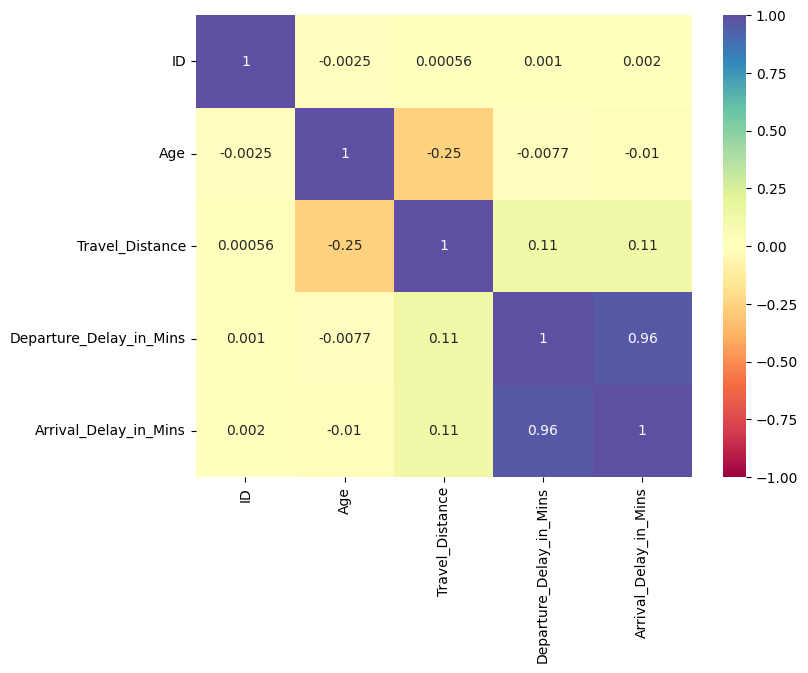

In [42]:
# Correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [43]:
columns_cat

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

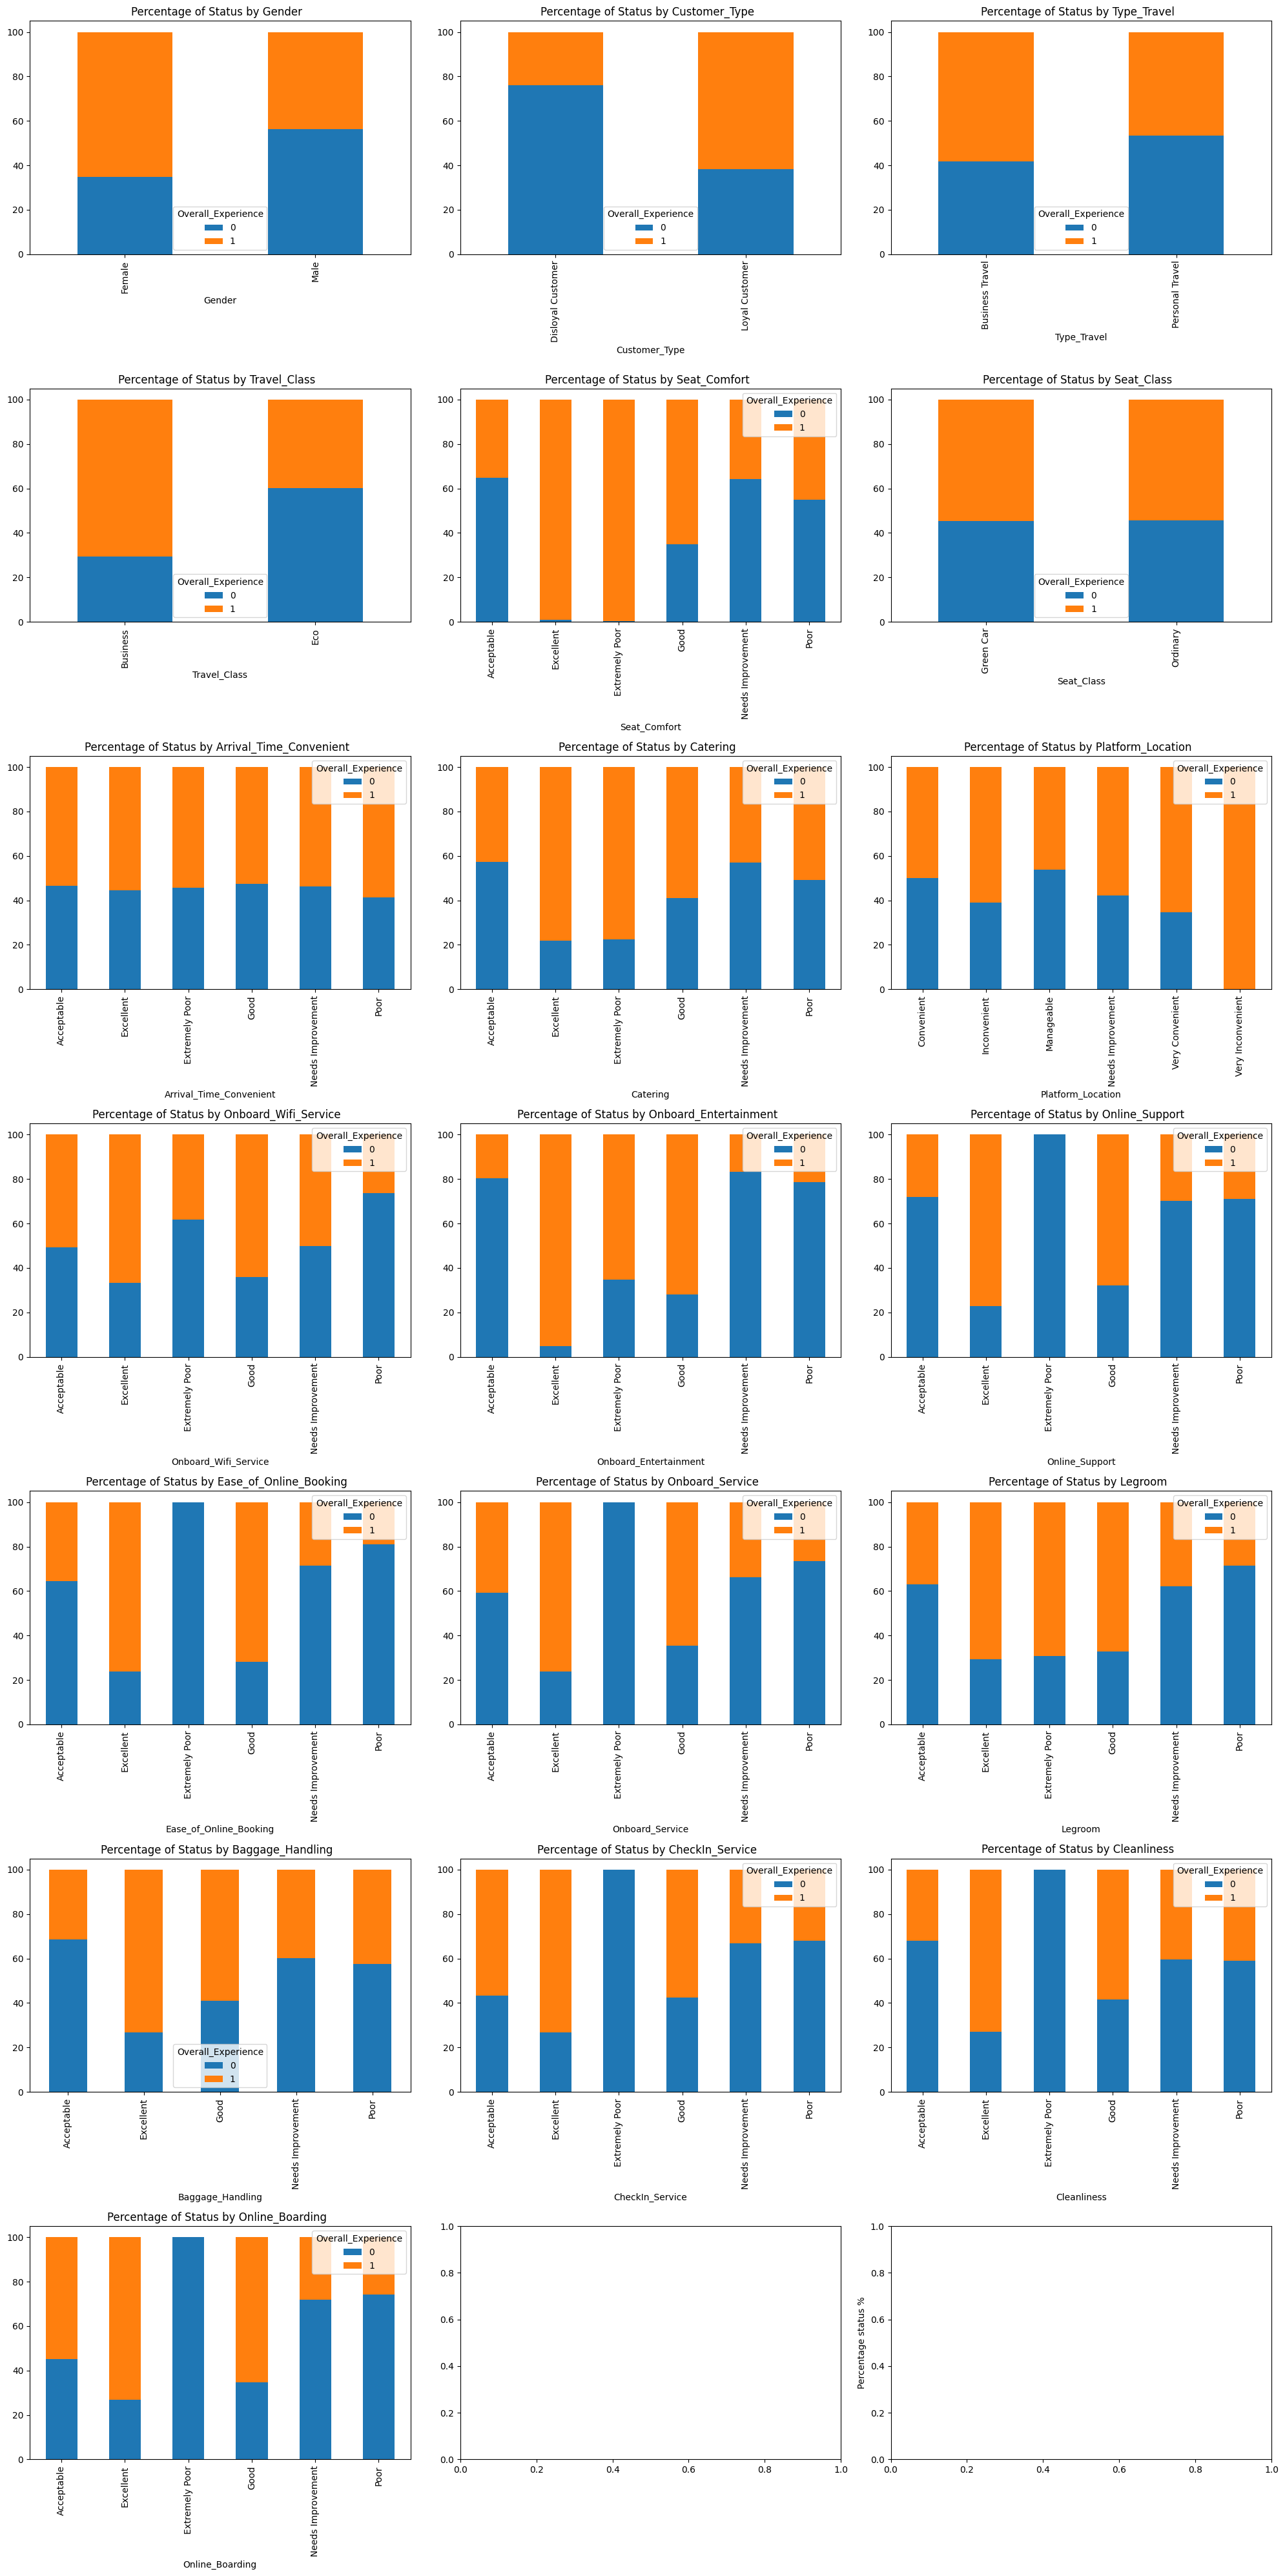

In [44]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))

# Plot each variable in a separate subplot
for i, var in enumerate(columns_cat[columns_cat!="Overall_Experience"]):
    row, col = divmod(i, 3)
    (pd.crosstab(df[var], df['Overall_Experience'], normalize = 'index')*100).plot(kind = 'bar',figsize = (20, 40), stacked = True, ax=axes[row, col])
    plt.ylabel('Percentage status %')
    axes[row, col].set_title(f'Percentage of Status by {var}  ')

# Adjust layout
plt.tight_layout()
plt.show()

**Observations**:
- Survey categorical variables seem to be very important for the predictive model

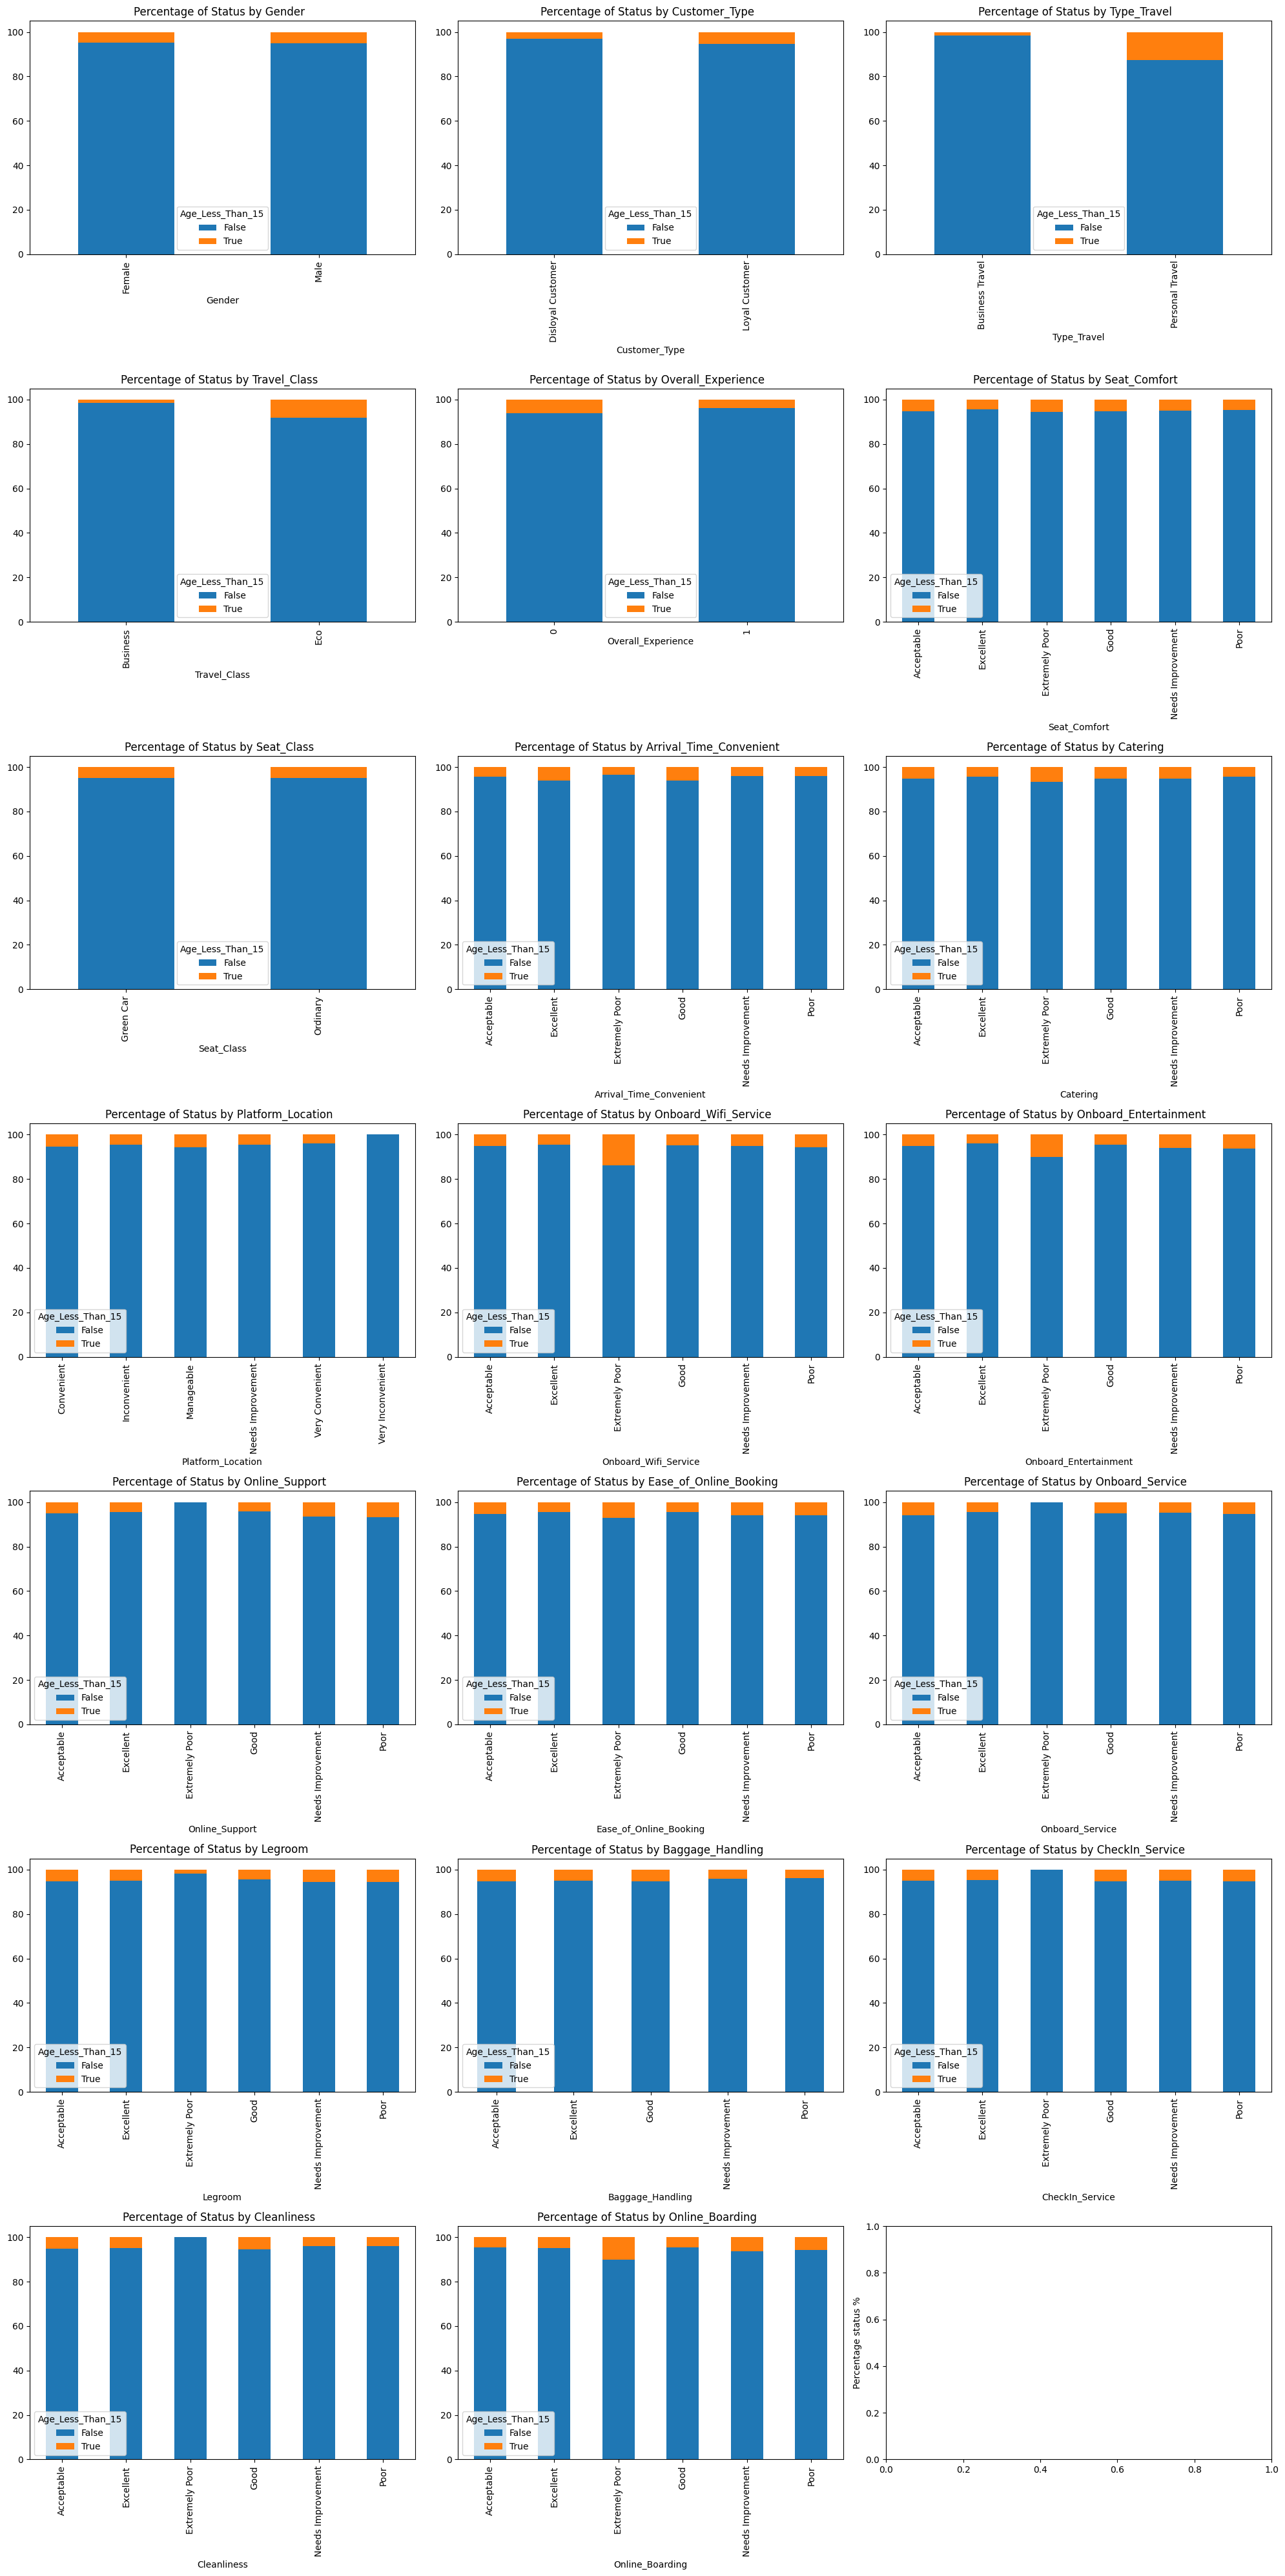

In [45]:
### Hacer analisis de hipotesis interesantes
### Los ninos responden diferente al resto

# Creating the new column for Age < 15
df['Age_Less_Than_15'] = df['Age'] < 15

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))

# Plot each variable in a separate subplot
for i, var in enumerate(columns_cat[columns_cat!="Age_Less_Than_15"]):
    row, col = divmod(i, 3)
    (pd.crosstab(df[var], df['Age_Less_Than_15'], normalize = 'index')*100).plot(kind = 'bar',figsize = (20, 40), stacked = True, ax=axes[row, col])
    plt.ylabel('Percentage status %')
    axes[row, col].set_title(f'Percentage of Status by {var}  ')

# Adjust layout
plt.tight_layout()
plt.show()

**Observations**:
-  Parece que los ninos no tienen un perfil diferente al del resto de la poblacion con diferentes edades. Parece que se puede continuar asi'

##### Can we use PCA for categorical variables?

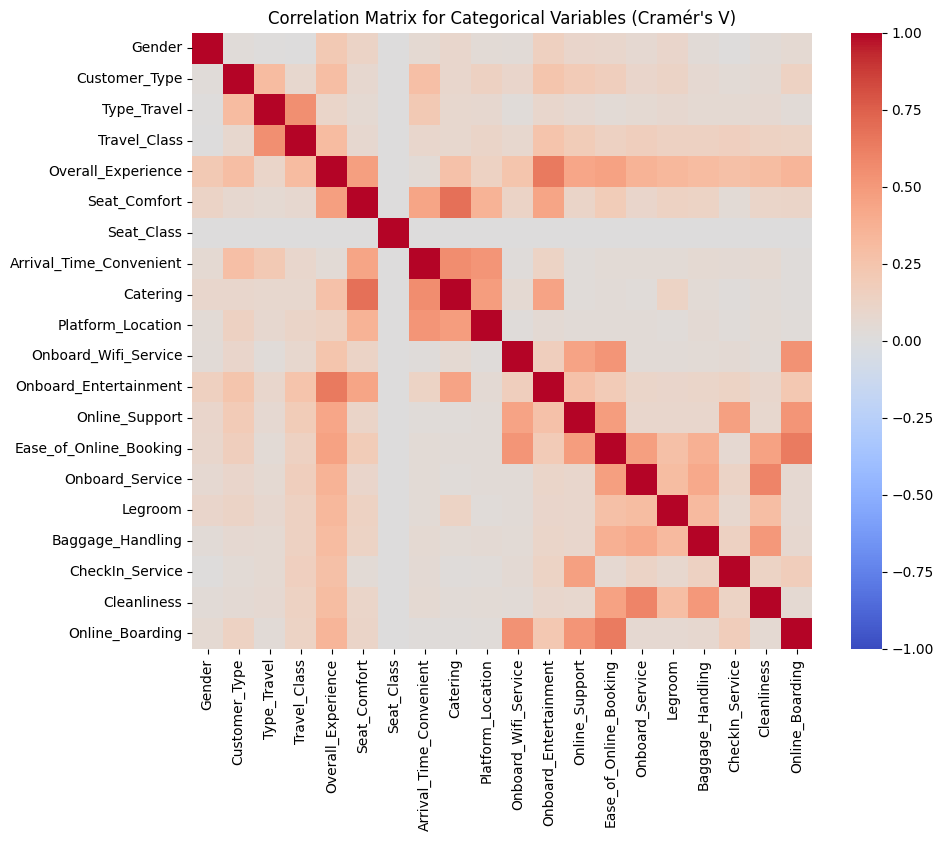

Overall_Experience         1.000000
Onboard_Entertainment      0.640665
Seat_Comfort               0.471069
Ease_of_Online_Booking     0.455936
Online_Support             0.434045
Onboard_Service            0.361171
Online_Boarding            0.350988
Legroom                    0.333817
Travel_Class               0.309102
Baggage_Handling           0.308723
Cleanliness                0.300202
Customer_Type              0.291990
CheckIn_Service            0.277582
Catering                   0.265731
Onboard_Wifi_Service       0.248231
Gender                     0.215239
Platform_Location          0.140210
Type_Travel                0.108628
Arrival_Time_Convenient    0.040762
Seat_Class                 0.000000
Name: Overall_Experience, dtype: float64


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))    
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
df['Overall_Experience']=df['Overall_Experience'].astype(object) 
# List of categorical variables
categorical_vars = df.select_dtypes(include="object").columns

# Create an empty dataframe to store Cramér's V values
corr_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Calculate Cramér's V for each pair of variables
for col1 in categorical_vars:
    for col2 in categorical_vars:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert the matrix to float
corr_matrix = corr_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Categorical Variables (Cramér\'s V)')
plt.show()
print(corr_matrix['Overall_Experience'].sort_values(ascending=False))


**observations**:
- In the overall experience the categorical variables have a high degree of asociation measured by the cramers V.
- Theres some correlation between onboard wifi,online support ease of online, onboard service and legroom Baggage handling. 
- Puede ser que sea util usar PCA si las variables categoricas lo permiten
- Se puede analizar cuales variables incluir en el PCA si tiene sentido 
- Investigue' que se pueden usar embedding techniques como Words2vec, que esta'n disenados para este problema, puede ser una mejora.

#### Pairplot con variables numericas


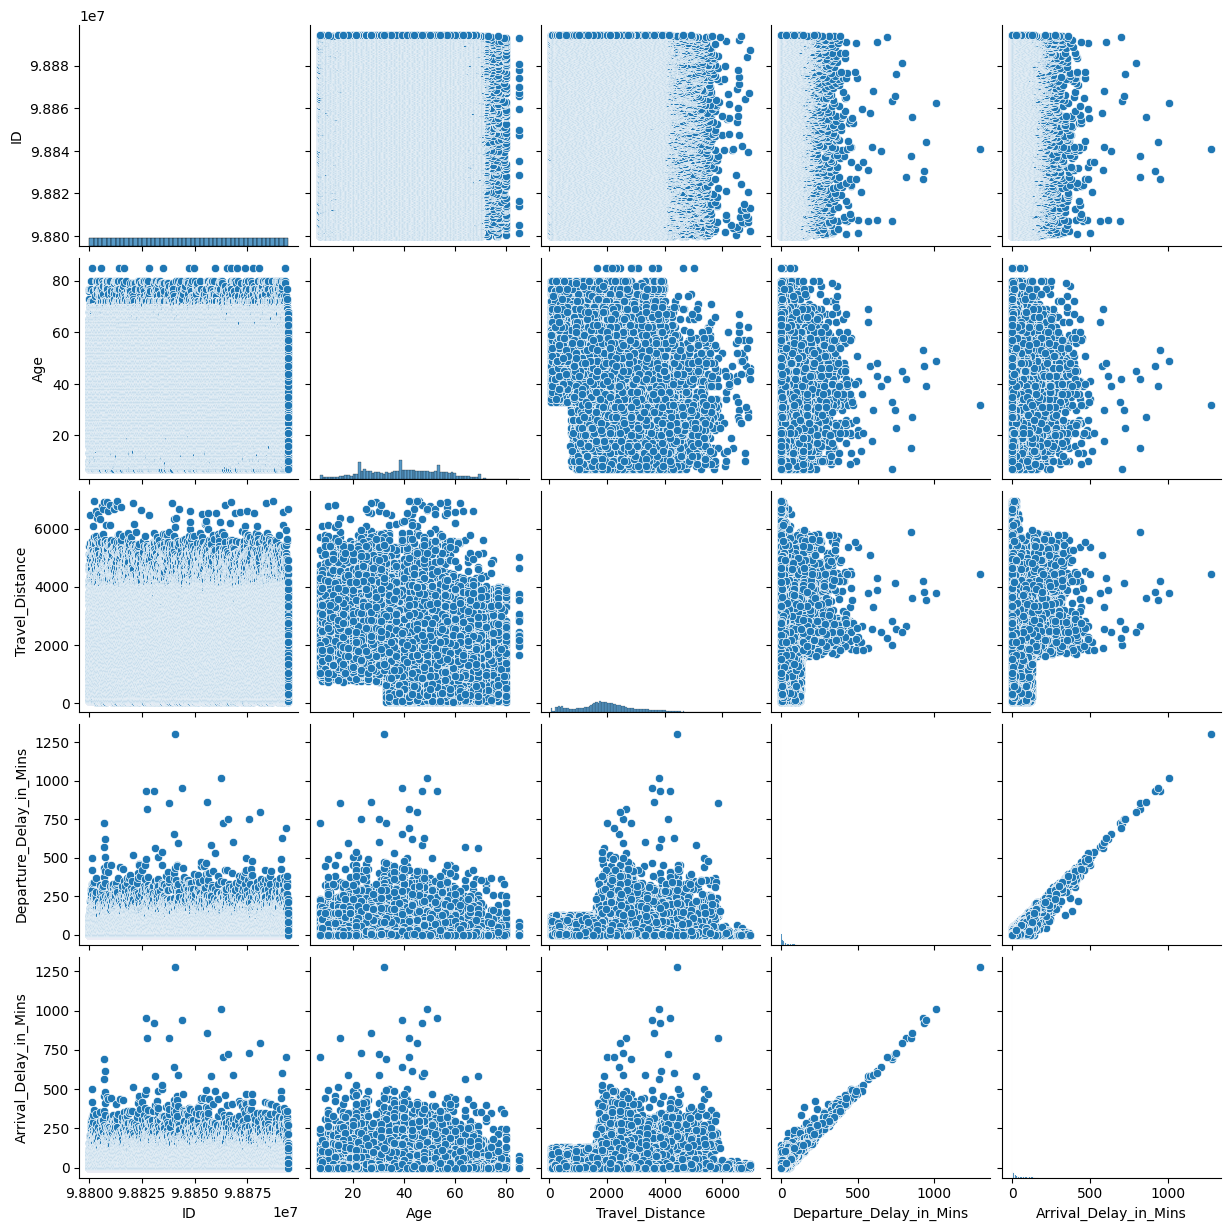

In [47]:
### make numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numerical_df)

**Observations**:
- no parece haber una correlacion importante entre las variables predictivas numericas, excepto por el delay
- Aunque hay una pequena informacio'n de que el delay no tiene una relacio'n 1 a 1 con el departure y el arrival, esta'n demasiado correlacionadas y podri'amos quedarno con una de las 2 (PCA no se' porque el resto no tiene una correlacio'n importante)
- Hay un patron interesante en el travel distance y el arrival y departure delay, parece que a grandes distancias y a muy cortas distancias el delay es muy bajo... esto es raro porque uno esperari'a que en viajes largos el departure fuera mayor o igual cuando menos. 
- Convertir departure y arrival delay a la suma de los dos o probar las dos.

[]
[]
[   45    71   103 ... 88987 89108 89165]
[    2    12    30 ... 89166 89179 89186]
[]


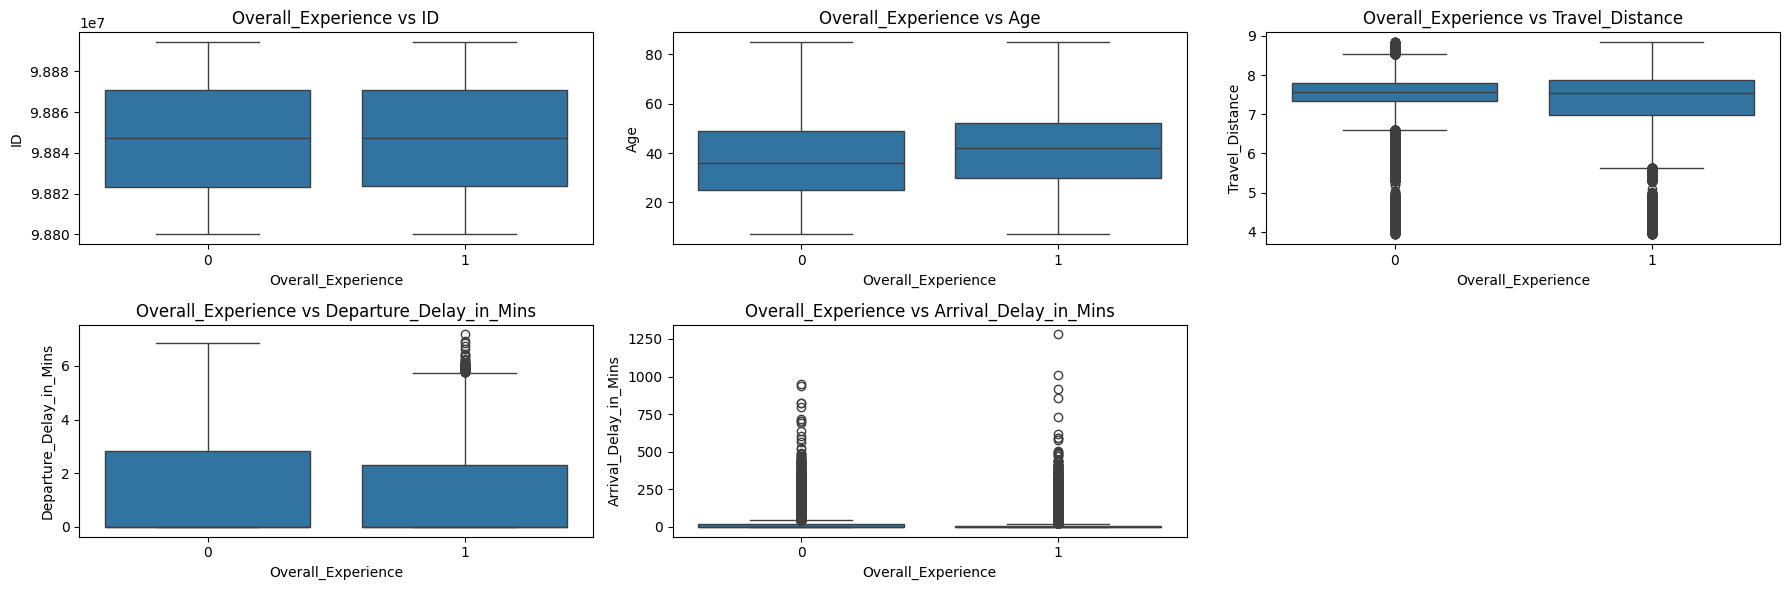

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_vs_experience(df):
    # Create a copy of the DataFrame with the specified name
    new_df = df.copy()
    
    # Identificar las variables numéricas
    numeric_vars = new_df.select_dtypes(include='number').columns
    # Número de variables numéricas
    num_vars = len(numeric_vars)
    # Función para detectar outliers usando el rango intercuartílico (IQR)
    def detect_outliers_iqr(data):
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return np.where((data < lower_bound) | (data > upper_bound))[0]

    # Detectar outliers y aplicar la transformación logarítmica si es necesario para cada variable numérica
    for var in numeric_vars:
        if len(detect_outliers_iqr(new_df[var])) > 2:
            new_df[var] = np.log1p(new_df[var])

    # Configuración del tamaño de la figura
    fig, axes = plt.subplots(nrows=(num_vars // 3) + (num_vars % 3 > 0), ncols=3, figsize=(18, (num_vars // 3) * 6))

    # Aplanar la matriz de ejes para un acceso más sencillo
    axes = axes.flatten()

    # Graficar la relación entre 'Overall_Experience' y cada variable numérica
    for i, var in enumerate(numeric_vars):
        sns.boxplot(y=var, x='Overall_Experience', data=new_df, ax=axes[i])
        axes[i].set_title(f'Overall_Experience vs {var}')

    # Eliminar subplots vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage example:
plot_numeric_vs_experience(df)

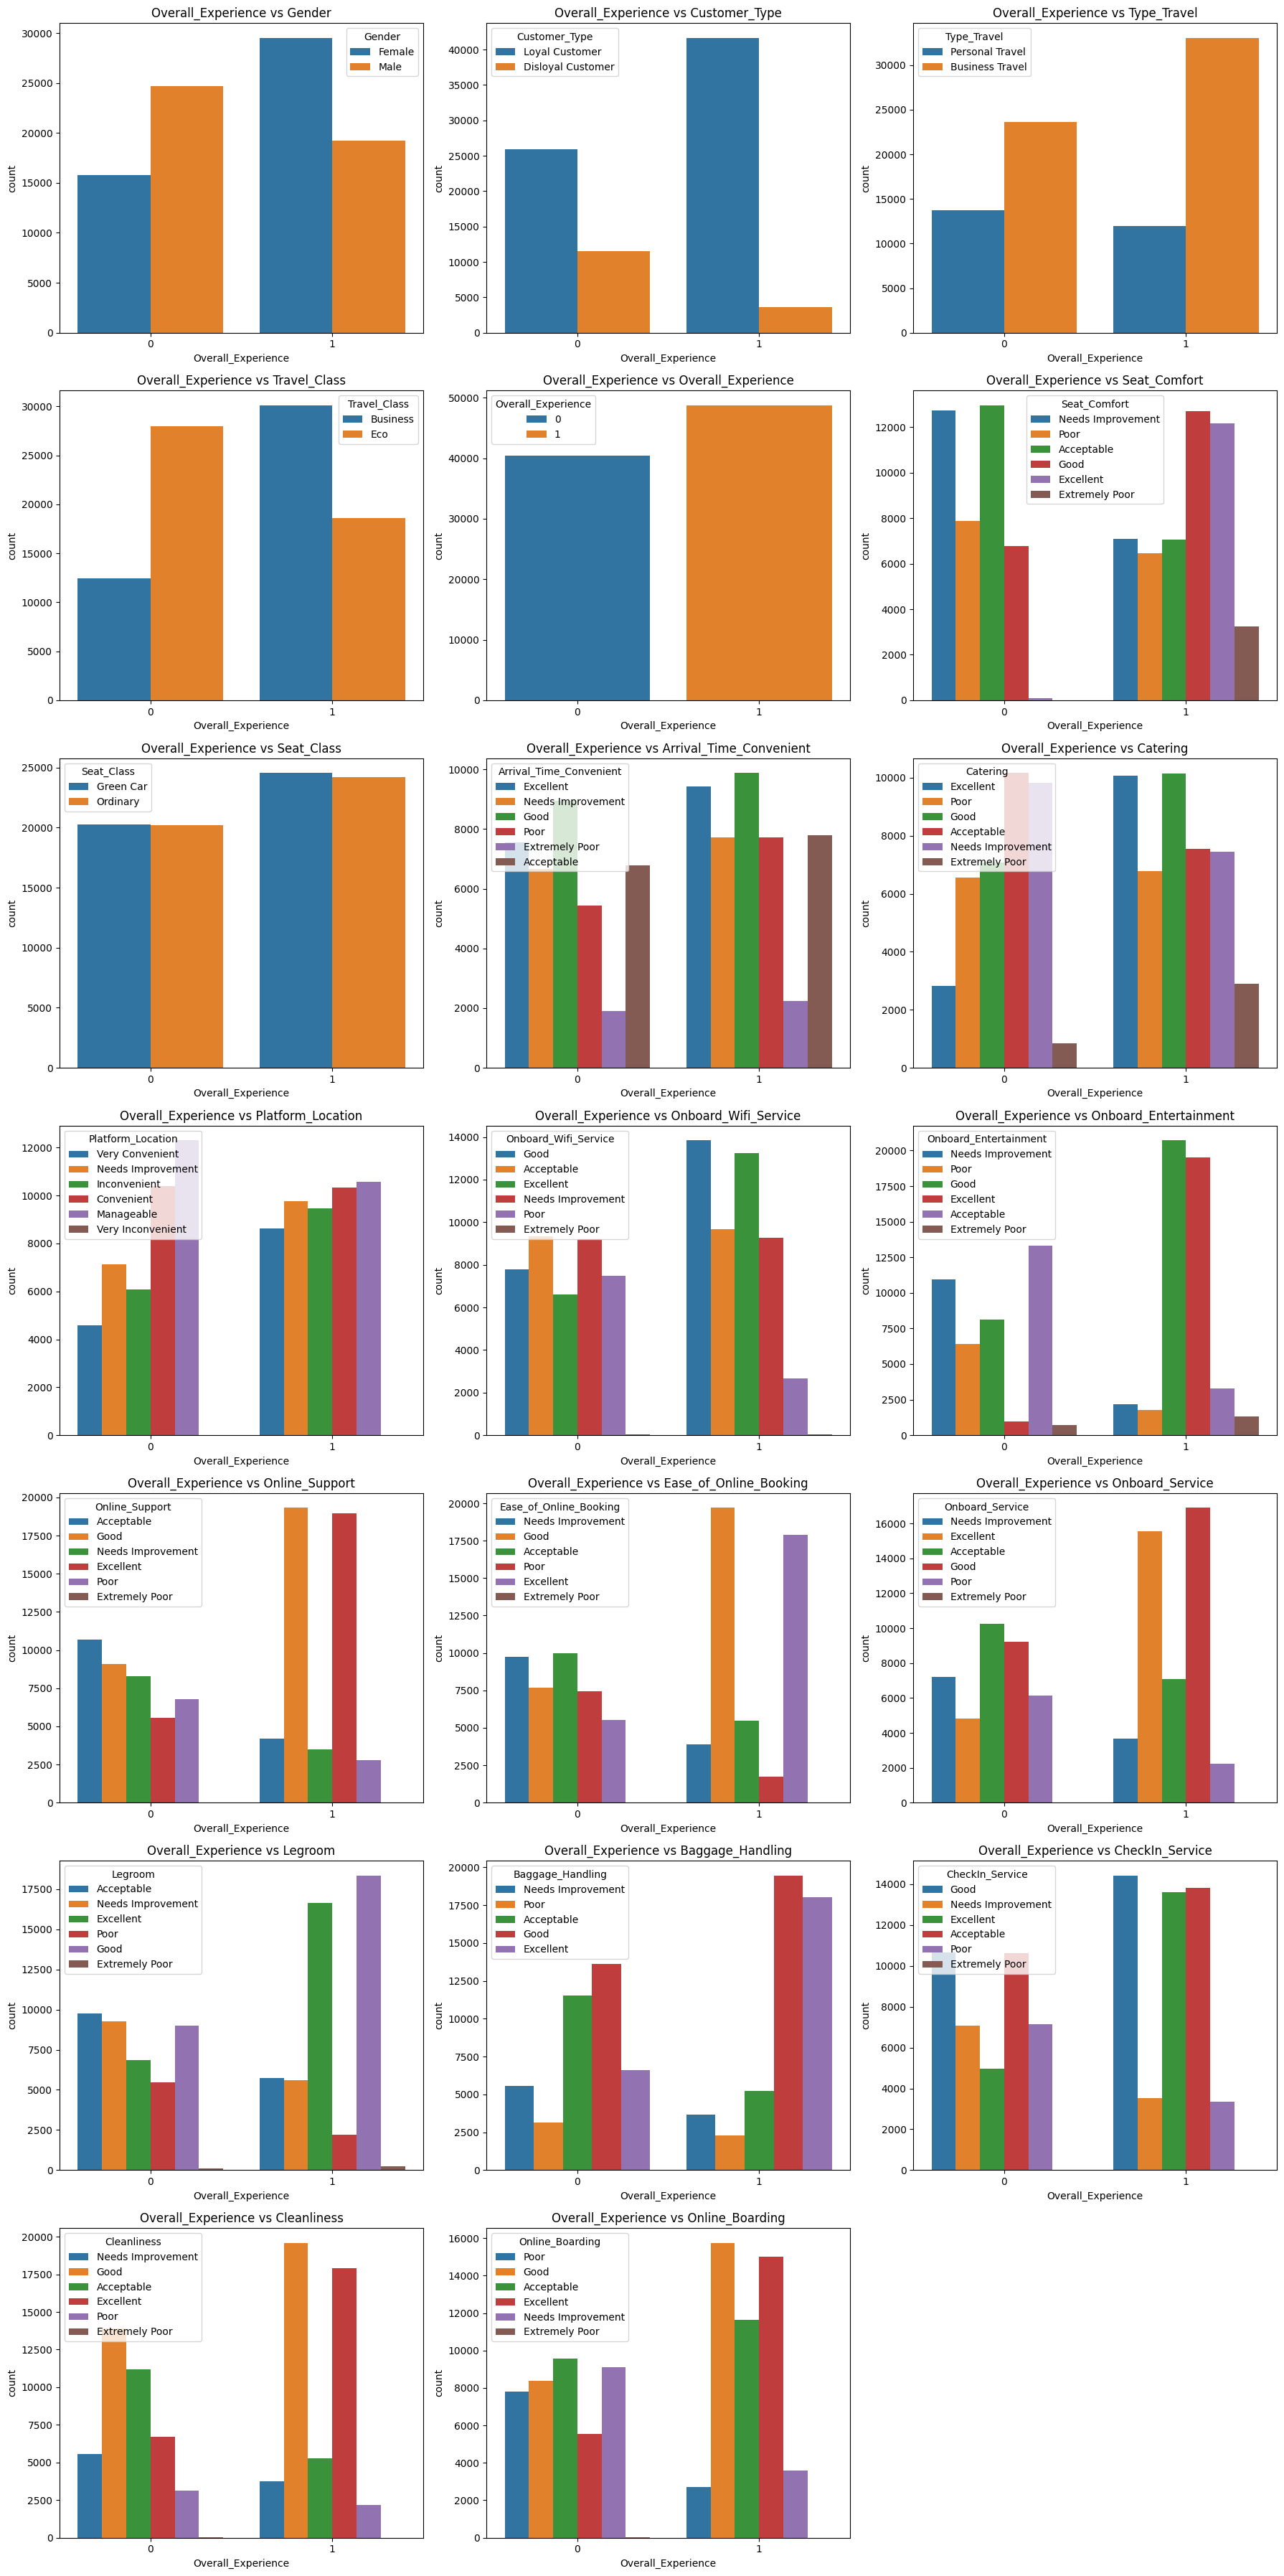

In [82]:
# Supongamos que tienes un DataFrame llamado 'df'
# df = pd.read_csv('tu_archivo.csv')

# Crear una copia del DataFrame original
df_copy = df.copy()

# Identificar las variables categóricas
categorical_vars = df_copy.select_dtypes(include=['object', 'category']).columns

# Identificar las variables numéricas
numerical_vars = df_copy.select_dtypes(include=[np.number]).columns


# Número de variables categóricas
num_vars = len(categorical_vars)

# Configuración del tamaño de la figura
fig, axes = plt.subplots(nrows=(num_vars // 3) + (num_vars % 3 > 0), ncols=3, figsize=(18, (num_vars // 3) * 6))

# Aplanar la matriz de ejes para un acceso más sencillo
axes = axes.flatten()

# Graficar la relación entre 'Overall_Experience' y cada variable categórica
for i, var in enumerate(categorical_vars):
    sns.countplot(hue=var, x='Overall_Experience', data=df_copy, ax=axes[i])
    axes[i].set_title(f'Overall_Experience vs {var}')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()